# Launching Jobs on IBM Quantum Computers

In this course so far we have launched most of our code locally (i.e. on our computers) where the results of our algorithm were simulated rather than actually *physically realized*. This notebook would show how to use actual **Quantum Computers** at IBM to launch jobs remotely.

This notebook outlines how set up an account with IBM and then demonstrates how to use that account and Qiskit API to deploy your code on quantum computers at IBM.

---

## Create an account with IBM

First we need to set up the IBM Quantum Provider. Follow along with the following steps to create an account with IBM.

1. Create an IBM Quantum Experience account or log in to your existing account by visiting
   the [IBM Quantum Experience login page](https://quantum-computing.ibm.com/login).

2. Copy your API token from your
   [IBM Quantum Experience account page](https://quantum-computing.ibm.com/account).

3. Take your token from step 2, here called `MY_API_TOKEN`, and run:

   ```python
   from qiskit import IBMQ
   IBMQ.save_account('MY_API_TOKEN')
   ```
   
   The command above stores your credentials locally in a configuration file called `qiskitrc`. 
   By default, this file is located in `$HOME/.qiskit`, where `$HOME` is your home directory.
   
Copy the API token from a screen that should look like the following:

![pic](pic.png)

   
Now that we have created our account and make sure Qiskit can access our API_TOKEN. The following section shows the methods needed to use our account and IBMQ to launch jobs on their hardware.

## Accessing your IBM Quantum Experience backends

After calling `IBMQ.save_account()`, your credentials will be stored on disk.
Once they are stored, at any point in the future you can load and use them
in your program simply via:

```python
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx2')
```

# Example showing use of IBM Computer Backend

This example shows how to use IBMQ to launch jobs on Quantum Computers at IBM. The following is the structure of the code.
1. Create a basic circuit
2. Use the "qasm_simulator" as our backend to launch the job locally on our machine.
3. Load our account from IBM
4. Use IBM Quantum Computer as our backend.
5. Contemplate the result.


In [1]:
from qiskit import *

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

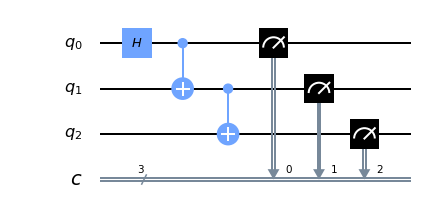

In [3]:
circuit.draw(output='mpl')

# Simulating the quantum circuit locally

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [5]:
from qiskit.visualization import plot_histogram

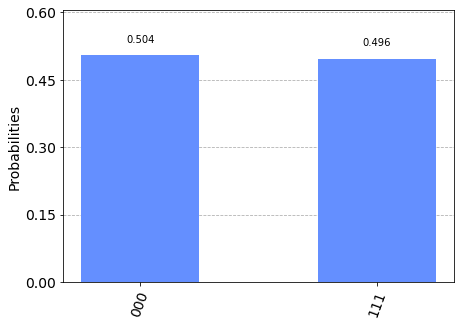

In [6]:
plot_histogram(sim_result.get_counts(circuit))

# Running the quantum circuit on a real quantum computer

You just have to run the following cell once for this project. Please replace the string `'YOUR_API_CRED_HERE'` with your actual API credential from IBM.

In [ ]:
IBMQ.save_account('YOUR_API_CRED_HERE')

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

Depending on how many jobs are being run on the IBM hardware the following command might take a couple of minutes.

In [8]:
job = execute(circuit, backend=device, shots=1024)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


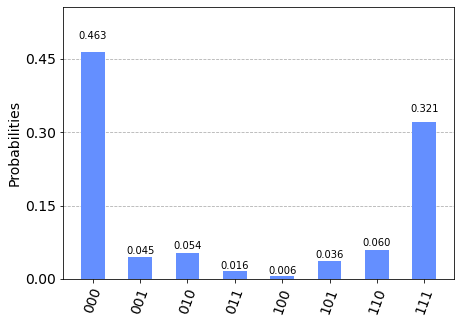

In [9]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

As you can see from the histogram, the result of the circuit is no longer *fully accurate*. The inheret noise in the quantum hardware leads to error in the final result - with that being said though, it should be appreciated that the highest probabilities were associated with the states that we were predicting to be the highest. True, it is no 50% as we expect, but we will get there some day soon 😊.